In [1]:
import gym


#定义环境
class MyWrapper(gym.Wrapper):

    def __init__(self):
        env = gym.make('LunarLander-v2',
                       continuous=False,
                       render_mode='rgb_array')
        super().__init__(env)
        self.env = env
        self.step_n = 0

    def reset(self):
        state, _ = self.env.reset()
        self.step_n = 0
        return state

    def step(self, action):
        state, reward, done, _, info = self.env.step(action)
        self.step_n += 1
        if self.step_n >= 400:
            done = True
        return state, reward, done, info


env = MyWrapper()

env.reset()

array([ 0.00538969,  1.4048686 ,  0.54590935, -0.26896894, -0.0062386 ,
       -0.12365669,  0.        ,  0.        ], dtype=float32)

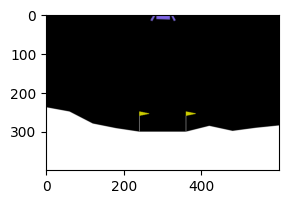

In [2]:
from matplotlib import pyplot as plt

%matplotlib inline


#打印游戏
def show():
    plt.figure(figsize=(3, 3))
    plt.imshow(env.render())
    plt.show()


show()

In [3]:
#认识游戏环境
def test_env():
    print('env.observation_space=', env.observation_space)
    print('env.action_space=', env.action_space)

    state = env.reset()
    action = env.action_space.sample()
    next_state, reward, done, info = env.step(action)

    print('state=', state)
    print('action=', action)
    print('next_state=', next_state)
    print('reward=', reward)
    print('done=', done)
    print('info=', info)


test_env()

env.observation_space= Box([-1.5       -1.5       -5.        -5.        -3.1415927 -5.
 -0.        -0.       ], [1.5       1.5       5.        5.        3.1415927 5.        1.
 1.       ], (8,), float32)
env.action_space= Discrete(4)
state= [-0.00166864  1.4159211  -0.16903177  0.22226675  0.00194033  0.03828825
  0.          0.        ]
action= 3
next_state= [-0.00327435  1.4203348  -0.16087165  0.19616231  0.00224203  0.00603511
  0.          0.        ]
reward= 2.052907066271645
done= False
info= {}


In [4]:
from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env

#初始化模型
model = PPO(
    policy='MlpPolicy',
    env=make_vec_env(MyWrapper, n_envs=8),  #使用N个环境同时训练
    learning_rate=1e-3,
    n_steps=1024,  #运行N步后执行更新,buffer_size=n_steps*环境数量
    batch_size=64,  #采样数据量
    n_epochs=16,  #每次采样后训练的次数
    gamma=0.99,
    verbose=0)

model

In [5]:
from stable_baselines3.common.evaluation import evaluate_policy

evaluate_policy(model, env, n_eval_episodes=20, deterministic=False)

/root/anaconda3/envs/pt39/lib/python3.9/site-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


(-178.7361532162933, 110.09158070393796)

In [6]:
# #训练
# model.learn(100_0000, progress_bar=True)

# #保存模型
# model.save('save/1.PPO.Lunar Lander')

Output()

In [7]:
#加载模型
model = PPO.load('save/1.PPO.Lunar Lander')

evaluate_policy(model, env, n_eval_episodes=20, deterministic=False)

(285.89778153869355, 18.83290154040063)

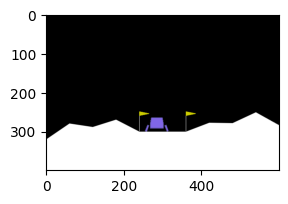

289.82857258297884 164 [0.17620373294079286, 0.16220330258954732, 0.0809007627084111, 0.5073526572152229, -0.499818711383341, 0.631813851261428, -0.3545947211171665, -1.0070048348956107, -1.2064146996285956, -1.2169994902541816, -0.6563874240848679, -0.9358495901069819, -1.3030842499314577, -1.6067412620130017, -1.7970015642710837, -2.254420794451903, -2.231539032546749, -2.205789552557718, -2.5365759946691626, -2.282116613951216, -1.4149922810397288, -1.9876987395138588, -1.3249989071920811, -1.7659053020176145, 1.666890153202172, 1.9893991781921556, -1.8317427412715404, -1.7935768317087764, 3.718253556270821, 4.812593414717679, 1.8010588588381438, -2.030756017884015, 0.7638008318559855, 1.5398837337343252, 0.5563416956563685, 1.504666611317259, 0.9328736743401123, 2.4066371697561637, 2.4339757917254135, 3.7253142136588737, 0.6640342835368187, -1.8912184377620906, 3.937421031608136, 1.7546994826778757, -1.8092980439585336, -1.5488961155926677, 1.4564751575926038, 3.7991907734726285, -

In [11]:
from IPython import display
import random


def test():
    state = env.reset()
    reward_sum = []
    over = False
    while not over:
        action, _ = model.predict(state)
        state, reward, over, _ = env.step(action)
        reward_sum.append(reward)

        if len(reward_sum) % 5 == 0:
            display.clear_output(wait=True)
            show()

    print(sum(reward_sum), len(reward_sum), reward_sum)


test()